# PCA

In [ ]:
# Applications
# 1. Noise Filtering
# 2. Visualization
# 3. Feature Extraction
# 4. Stock market predictions

# Goal is to identify patterns in data and detect the correlation between the variables
# Affected by outliers in the dataset

# From the m independent variables in the dataset, PCA extracts p<=m new independent variables 
# that explain the most variance of the dataset, regardless the dependent variable

In [10]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv("/Users/omkarmutreja/Downloads/PCA/Wine.csv")
print(df.head())
X = df.iloc[:,0:13].values
y = df.iloc[:,13].values
print(X.shape)
print(y.shape)

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

In [6]:
# Training and Testing Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [9]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

## Applying PCA

In [17]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance
# Component 1 explains around 37% variance in the dataset

array([0.36884109, 0.19318394])

## Applying Logistic Regression model

In [18]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

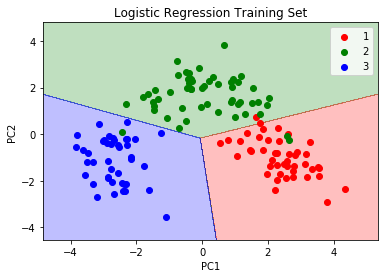

In [19]:
## Visualizing Training set results
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop=X_set[:,0].max()+1,step=0.01),
                   np.arange(start = X_set[:,1].min() - 1, stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.25,cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('Logistic Regression Training Set')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

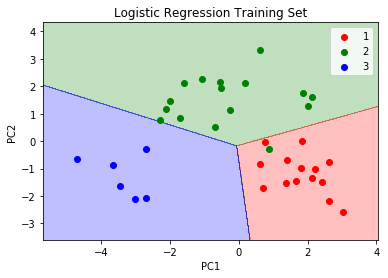

In [22]:
# Visualizing Test set results
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop=X_set[:,0].max()+1,step=0.01),
                   np.arange(start = X_set[:,1].min() - 1, stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.25,cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('Logistic Regression Training Set')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()